In [1]:
import pandas as pd
import numpy as np
from math import sqrt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense, Input
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('test.csv')
test = pd.read_csv('test.csv')

In [3]:
width = height = int(sqrt(train.shape[1]))
total = train.shape[0]

In [4]:
X_train = train.to_numpy()
X_train = np.resize(X_train, (total, width, height))

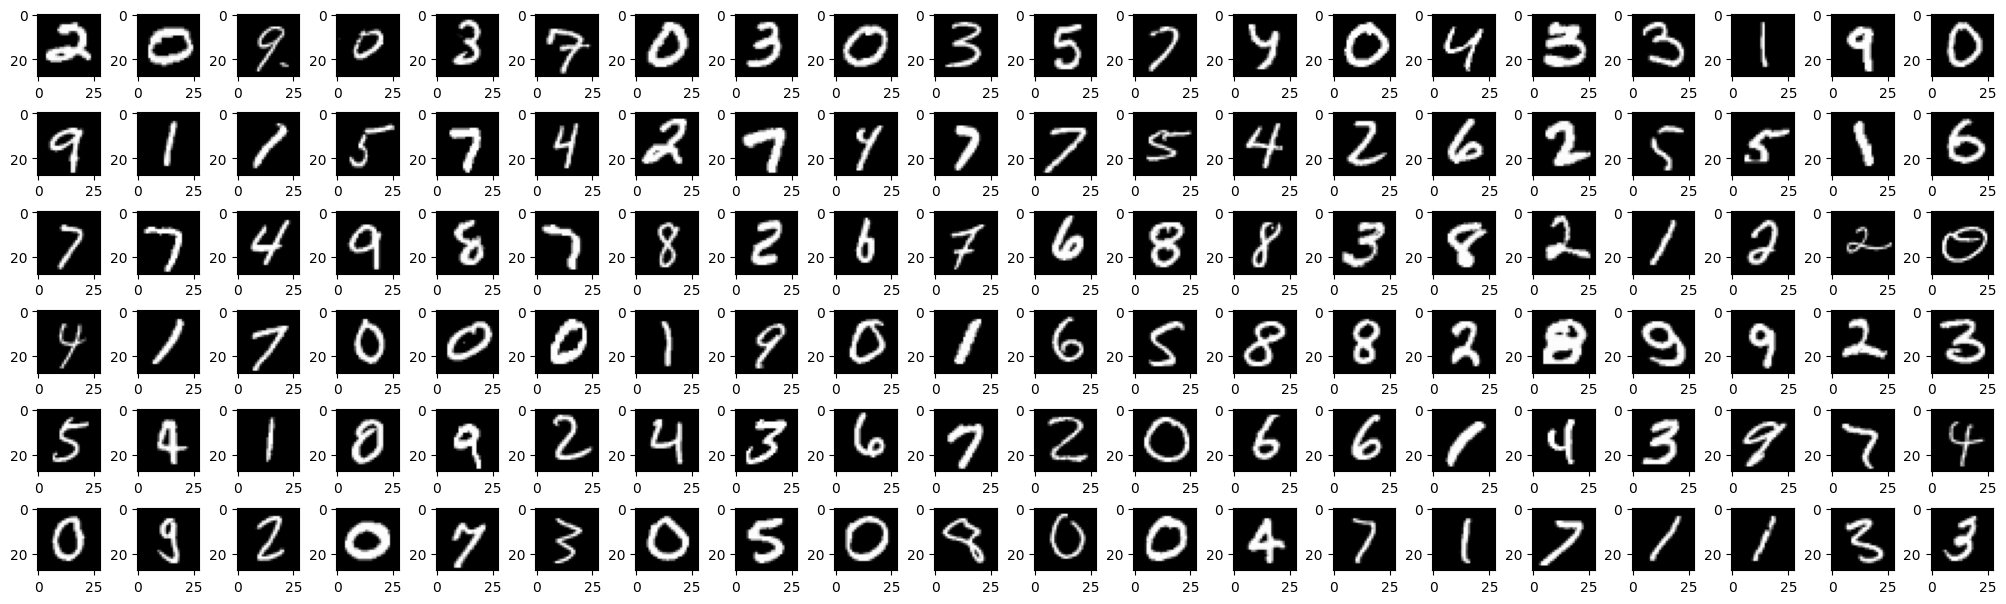

In [5]:
rows, cols = 6, 20
fig, axs = plt.subplots(rows, cols, figsize = (20, 6))
for i in range(rows):
    for j in range(cols):
        axs[i][j].imshow(X_train[cols*i + j], cmap='gray')
fig.tight_layout(pad=0.5)
plt.show()

In [6]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [7]:
x_train = np.array(x_train, dtype = np.float16)
x_train = np.resize(x_train, (* x_train.shape[:3], 1))

In [8]:
model = keras.Sequential([
    Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = (28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'),
    MaxPooling2D((2, 2)),
    Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = (28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dropout(0.2),
    Dense(128, activation = 'relu'),
    Dropout(0.2),
    Dense(10, activation = 'softmax')
])

In [9]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [10]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience = 10, min_delta = 0.0001, restore_best_weights = True)

In [11]:
history = model.fit(x_train, y_train, validation_split = 0.2, epochs = 100, callbacks = early_stopping)

Epoch 1/100
1500/1500 [==============================] - 37s 24ms/step - loss: 0.3277 - accuracy: 0.9227 - val_loss: 0.0586 - val_accuracy: 0.9817
Epoch 2/100
1500/1500 [==============================] - 37s 25ms/step - loss: 0.0875 - accuracy: 0.9741 - val_loss: 0.0576 - val_accuracy: 0.9819
Epoch 3/100
1500/1500 [==============================] - 36s 24ms/step - loss: 0.0760 - accuracy: 0.9770 - val_loss: 0.0446 - val_accuracy: 0.9877
Epoch 4/100
1500/1500 [==============================] - 33s 22ms/step - loss: 0.0625 - accuracy: 0.9816 - val_loss: 0.0653 - val_accuracy: 0.9818
Epoch 5/100
1500/1500 [==============================] - 32s 21ms/step - loss: 0.0554 - accuracy: 0.9830 - val_loss: 0.0425 - val_accuracy: 0.9882
Epoch 6/100
1500/1500 [==============================] - 32s 21ms/step - loss: 0.0514 - accuracy: 0.9849 - val_loss: 0.0526 - val_accuracy: 0.9864
Epoch 7/100
1500/1500 [==============================] - 34s 23ms/step - loss: 0.0465 - accuracy: 0.9865 - val_loss: 0

<AxesSubplot: >

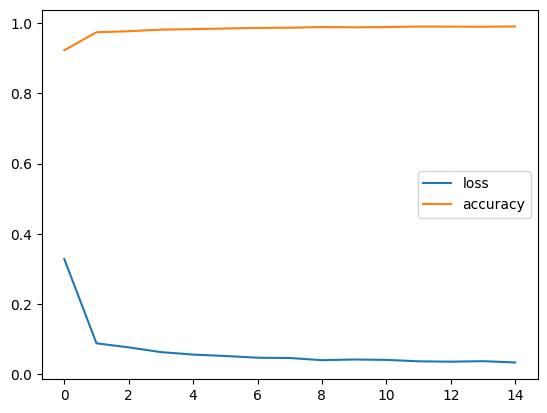

In [12]:
metrics = pd.DataFrame(history.history)
metrics[['loss', 'accuracy']].plot()

In [13]:
x_test = np.resize(x_test, (* x_test.shape[:3], 1))

In [14]:
pred = model.predict(x_test)

313/313 [==============================] - 2s 7ms/step


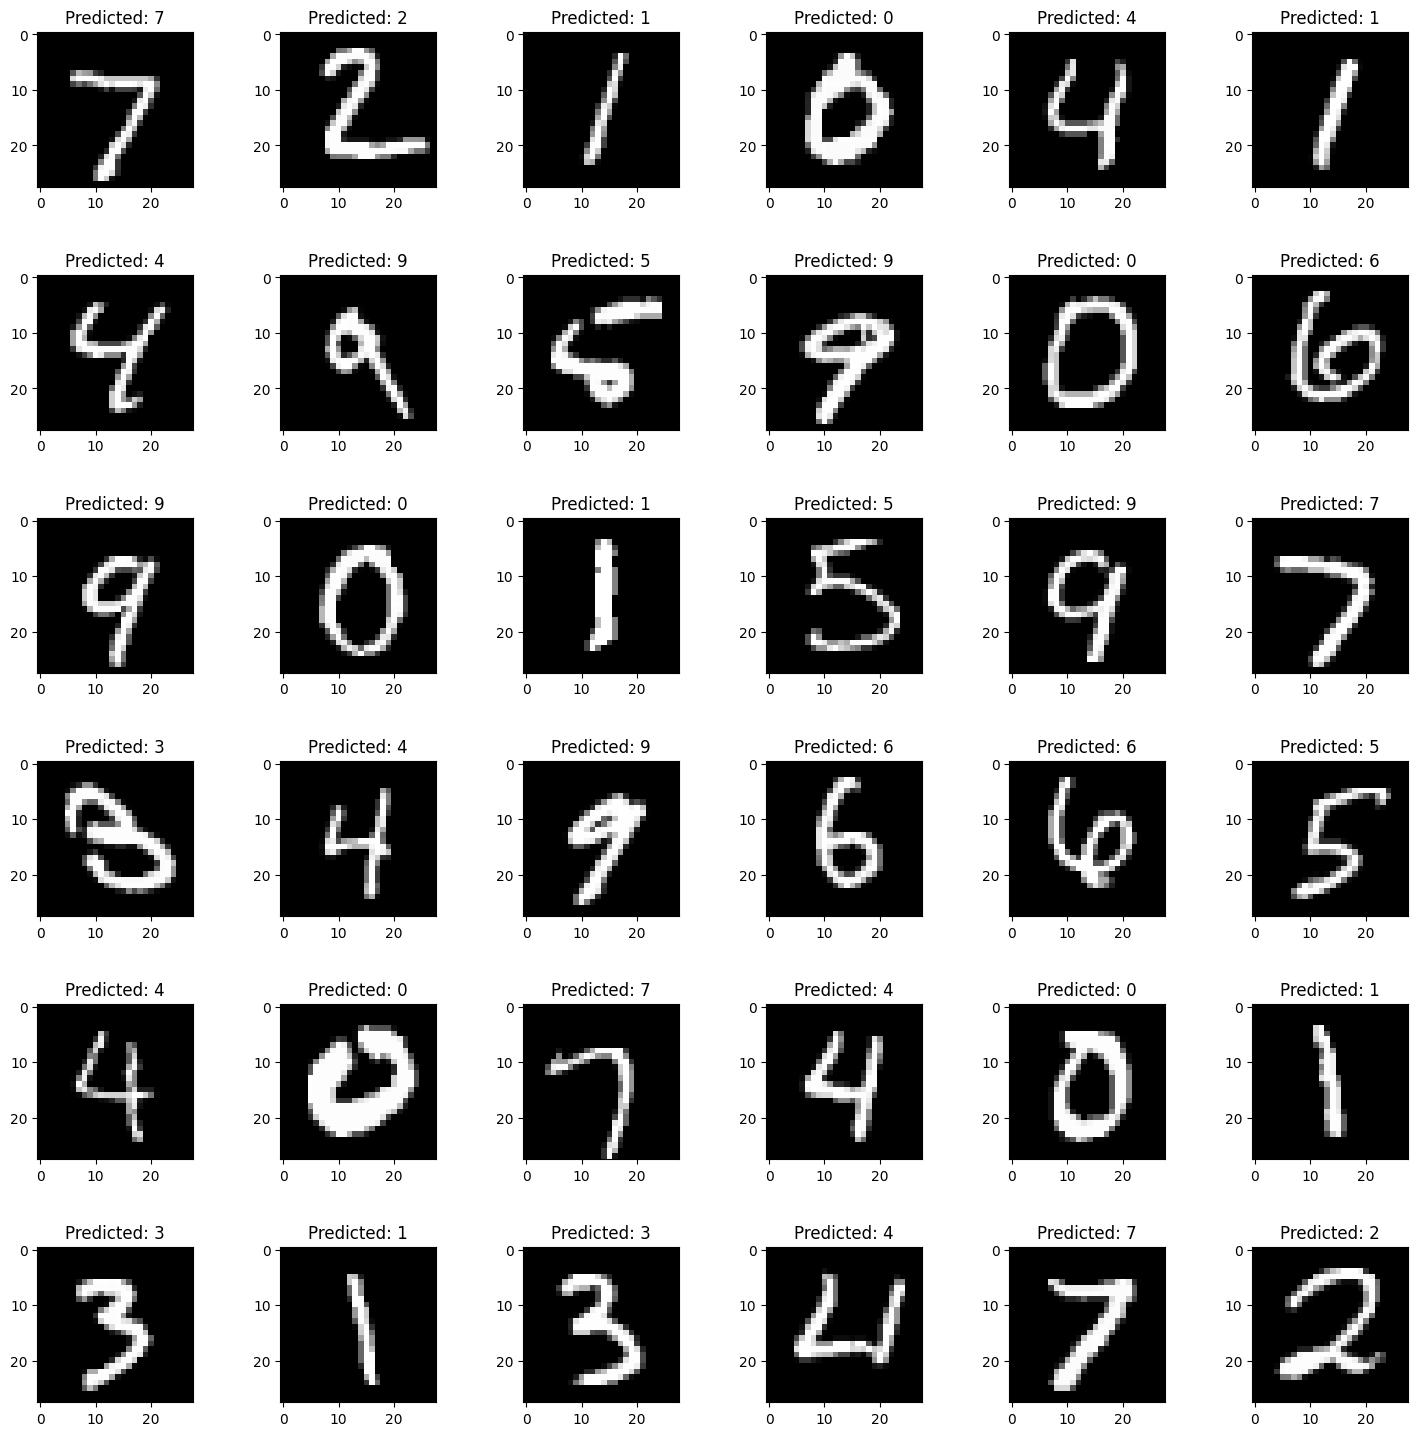

In [15]:
rows, cols = 6, 6
fig, axs = plt.subplots(rows, cols, figsize = (15, 15))
for i in range(rows):
    for j in range(cols):
        axs[i][j].imshow(x_test[rows*i + j], cmap='gray')
        axs[i][j].set_title("Predicted: "+str(list(pred[rows*i + j]).index(max(list(pred[rows*i + j])))))
fig.tight_layout(pad=3.0)
plt.show()
def histogram(pred):
    xhist = []
    for item in range(10):
        for j in range(int(pred[item] * 100)):
            xhist.append(item)
    return xhist
    
def c(item):
    return [0 if i != item.index(max(item)) else 1 for i in item]

In [16]:
def histogram(pred):
    xhist = []
    for item in range(10):
        for j in range(int(pred[item] * 100)):
            xhist.append(item)
    return xhist

def c(item):
    return [0 if i != item.index(max(item)) else 1 for i in item]

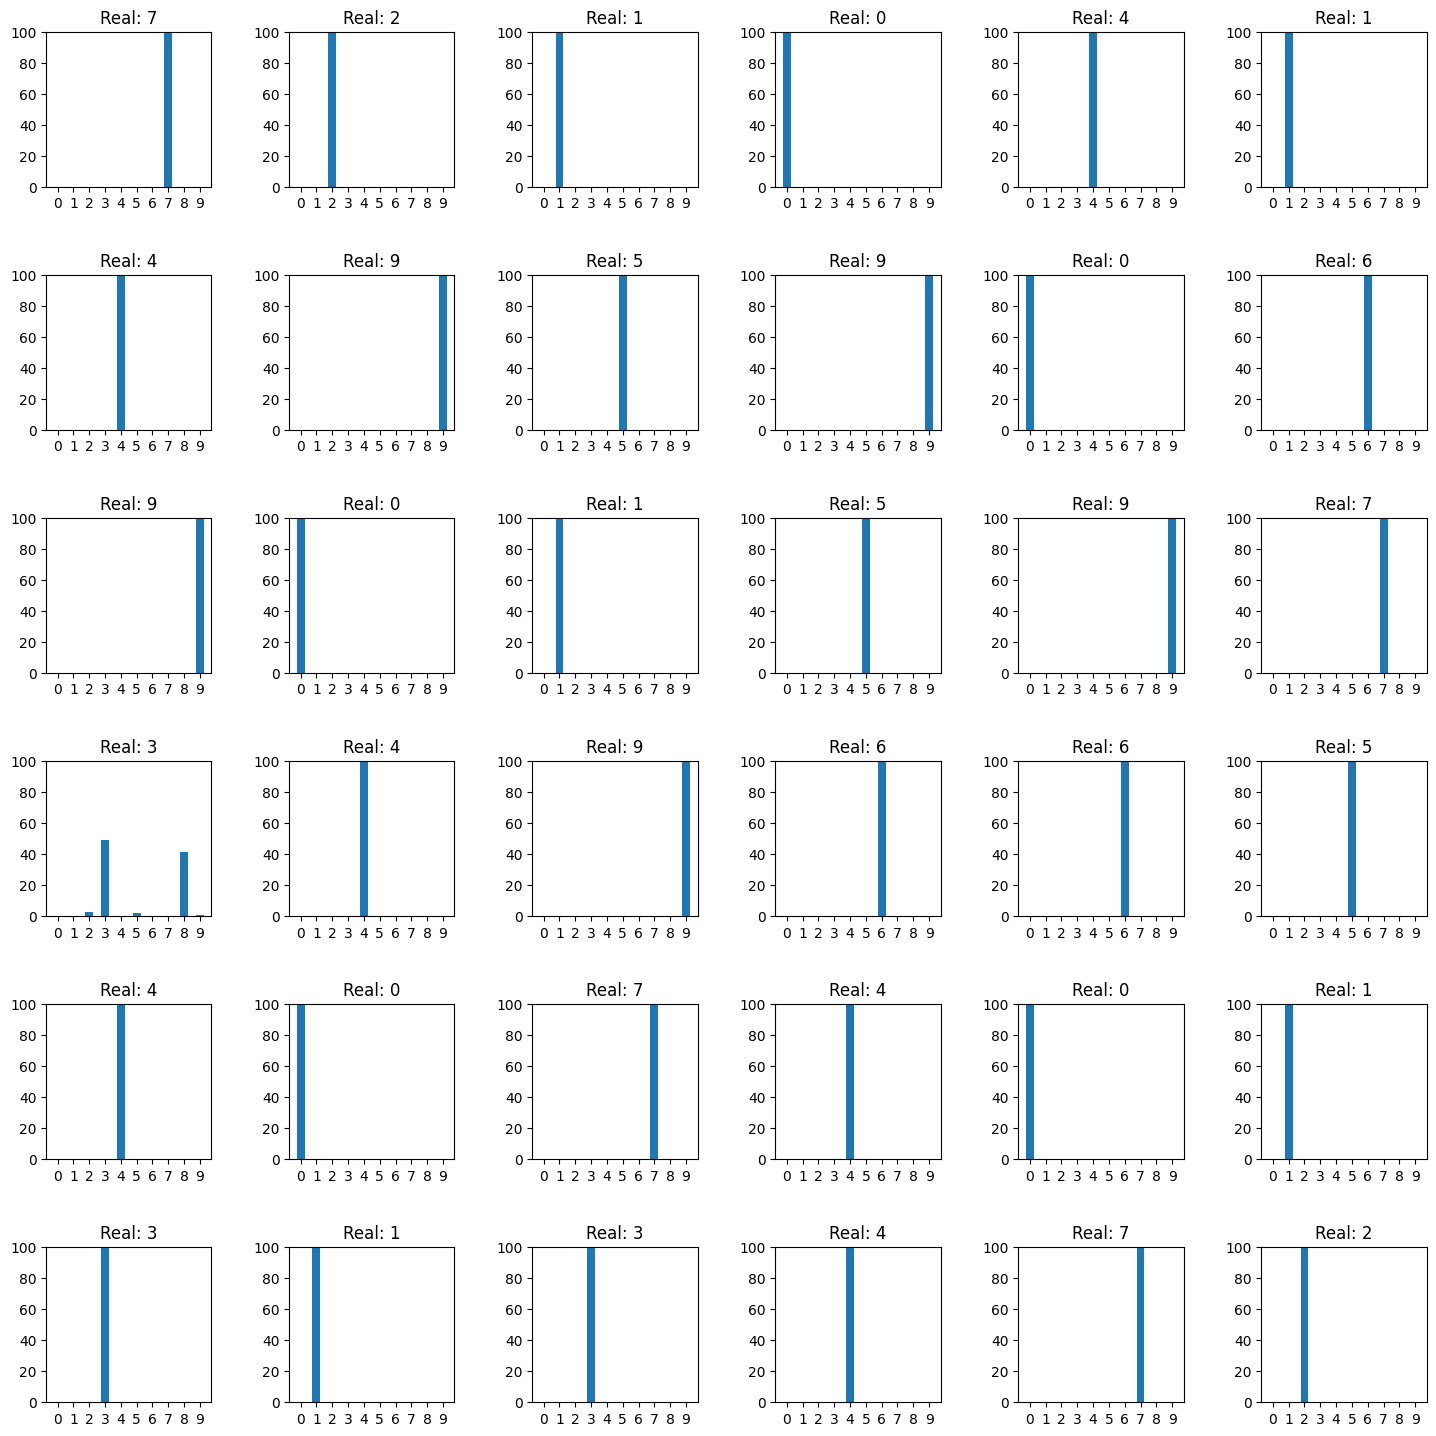

In [17]:
rows, cols = 6, 6
fig, axs = plt.subplots(rows, cols, figsize = (15, 15))
for i in range(rows):
    for j in range(cols):
        axs[i][j].hist(histogram(pred[rows*i + j]), bins = np.linspace(-0.25, 9.25, 20))
        axs[i][j].set_xticks(range(10))
        axs[i][j].set_ylim((0, 100))
        axs[i][j].set_title("Real: "+str(y_test[rows*i + j]))
fig.tight_layout(pad=3.0)
plt.show()

In [18]:
def setup(pred):
    return list(map(lambda x: list(x).index(np.max(x)), pred))

In [19]:
final_pred = setup(pred)

In [20]:
from sklearn.metrics import confusion_matrix
df_conf=pd.DataFrame(confusion_matrix(final_pred, y_test), columns = range(10))
df_conf

,0,1,2,3,4,5,6,7,8,9
0,971,0,0,0,0,1,1,0,0,1
1,0,1128,0,0,0,0,2,2,0,0
2,2,0,1027,1,1,0,1,5,1,0
3,0,0,0,998,0,5,0,0,1,0
4,0,0,0,0,971,0,0,1,0,9
5,0,0,0,3,0,882,0,0,1,4
6,5,1,0,0,2,3,954,0,3,0
7,2,1,5,4,0,0,0,1018,0,6
8,0,5,0,4,1,0,0,1,967,7
9,0,0,0,0,7,1,0,1,1,982


In [21]:
from sklearn.metrics import classification_report
print(classification_report(final_pred, y_test))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       974
           1       0.99      1.00      1.00      1132
           2       1.00      0.99      0.99      1038
           3       0.99      0.99      0.99      1004
           4       0.99      0.99      0.99       981
           5       0.99      0.99      0.99       890
           6       1.00      0.99      0.99       968
           7       0.99      0.98      0.99      1036
           8       0.99      0.98      0.99       985
           9       0.97      0.99      0.98       992

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [22]:
test = test.to_numpy()
test = np.resize(test, (total, width, height))
test = np.resize(test, (* test.shape[:3], 1))

In [23]:
pred = model.predict(test)
final_pred = setup(pred)

875/875 [==============================] - 6s 6ms/step


In [24]:
output = pd.DataFrame(final_pred, columns = ['Label']); output.index += 1; output.head()

,Label
1,2
2,0
3,9
4,9
5,3


In [25]:
final_pred[:5]

[2, 0, 9, 9, 3]

In [26]:
output.to_csv('submission.csv', index_label = 'ImageId')

In [27]:
final = pd.read_csv('submission.csv')

In [28]:
final.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [29]:
final.shape

(28000, 2)